In [1]:
import json
from binance.um_futures import UMFutures
from binance.client import Client
import pandas as pd
import numpy as np
from coinAPI_binanceList import get_auth_pair

binance_list_pair = get_auth_pair()

# um_futures_client = UMFutures(key='SSXkAxuv2Zez5asJ0idZSeuPgyFD9l0ttvc0nbLZDFyQ6HwvWMIDGUlx4WGygufp',
#                               secret='YDV8uTGawx9MbnQUPZvCa29qE5uAwhOabpzWaNvvHzhfXUwNyTj4HCreJGrMkbLq')

client = Client('SSXkAxuv2Zez5asJ0idZSeuPgyFD9l0ttvc0nbLZDFyQ6HwvWMIDGUlx4WGygufp',
                              'YDV8uTGawx9MbnQUPZvCa29qE5uAwhOabpzWaNvvHzhfXUwNyTj4HCreJGrMkbLq')
# um_futures_client = UMFutures()

def check_1h_rate(symbol):
    klines = um_futures_client.get_klines(symbol=symbol, interval='1m', limit=60)
    # klines = client.get_klines(symbol=symbol, interval='15m', limit=1000)
    columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume',
            'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
    df = pd.DataFrame(klines, columns=columns)
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
    df['Rate Change (%)'] = round(((df['High'].astype(float) - df['Low'].astype(float)) / df['Low'].astype(float)) * 100)
    last_hour_price = float(df.iloc[0, 1])
    current_price = float(df.iloc[-1, 4])
    temp = current_price - last_hour_price
    if temp != 0:
        result = round(temp/last_hour_price * 100, 2)
    else:
        result = 0
    if result > 5 or result < -5:
        print(symbol, ": ", result, "%")
        return {
            "symbol": symbol,
            "result": result
        }
    return None
    print(symbol, ": ", result, "%")

In [18]:
symbol = 'BTCUSDT'
# Get the 1-hour klines (candlestick) data
# klines = um_futures_client.klines("1000FLOKIUSDT", "1h", **{"limit": 60})
# klines = um_futures_client.mark_price_klines("1000FLOKIUSDT", "1m", **{"limit": 60})
klines = client.get_klines(symbol=symbol, interval='1d', limit=1000)
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume',
           'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(klines, columns=columns)
df['new price'] = (df['Open'].astype(float) + df['Close'].astype(float)) / 2000
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
df['Mark'] = np.where(df['Open'].astype(float) > df['Close'].astype(float), -1, 1)
df['Rate Change (%)'] = round(((df['High'].astype(float) - df['Low'].astype(float)) / df['Low'].astype(float)) * 100) * df['Mark']


In [22]:
for i in range(-5, -10, -1):
    print(i)

-5
-6
-7
-8
-9


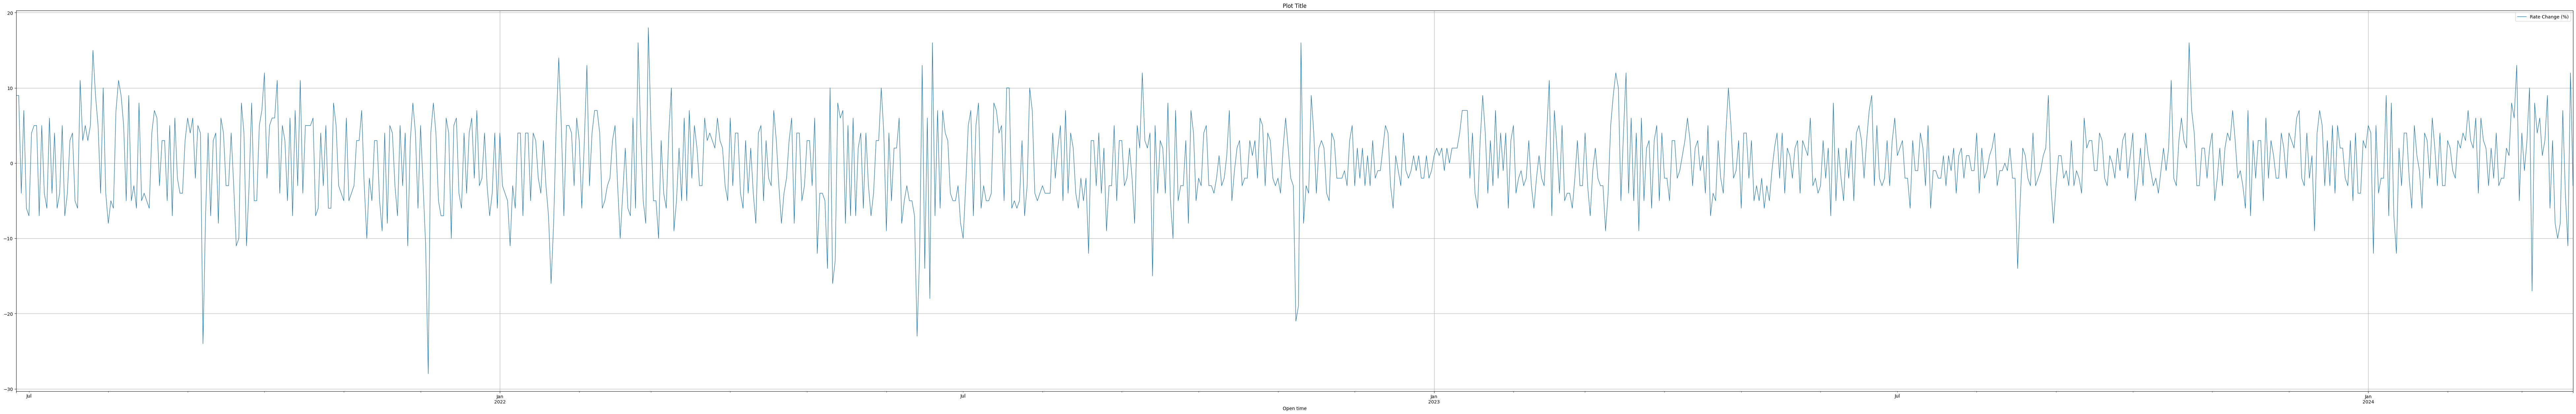

In [16]:

import matplotlib.pyplot as plt
import numpy as np
# plt.yticks(range(0, 70, 5))
fig, ax = plt.subplots(figsize=(100, 15))
df.plot(x='Open time', y='Rate Change (%)', kind="line", linewidth=1.0, ax=ax)
# df.plot(x='Open time', y='new price', kind="line", linewidth=1.0, ax=ax)
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
ax.set_title('Plot Title')

# Show the plot
# plt.yticks(range(-50, 0, 5))
plt.grid(True)  # Add grid
plt.show()

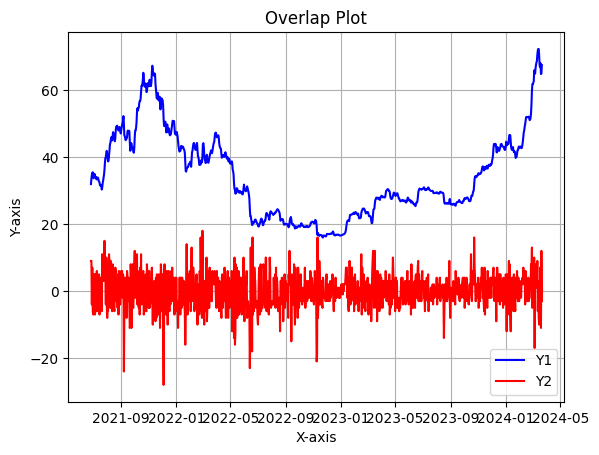

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# data = {'x': [1, 2, 3, 4, 5], 'y1': [10, 15, 20, 25, 30], 'y2': [5, 10, 15, 20, 25]}
# df = pd.DataFrame(data)

# Plot the first dataset
plt.plot(df['Open time'], df['new price'], label='Y1', linestyle='-', color='blue')

# Plot the second dataset on the same axes
plt.plot(df['Open time'], df['Rate Change (%)'], label='Y2', linestyle='-', color='red')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Overlap Plot')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid
plt.show()

In [9]:
# Group the DataFrame by the 'Open time' column
grouped_df = df.groupby('Rate Change (%)')

# Print the first row of each group
group_lengths = grouped_df.size()

# Display the length of each group
print("Length of Each Group:")
print(group_lengths)

Length of Each Group:
Rate Change (%)
-57.0     1
-31.0     2
-29.0     1
-28.0     1
-25.0     1
-24.0     2
-21.0     5
-20.0     2
-19.0     4
-18.0     5
-17.0     5
-16.0     8
-15.0     4
-14.0     9
-13.0     9
-12.0    11
-11.0    14
-10.0    14
-9.0     16
-8.0     28
-7.0     24
-6.0     29
-5.0     33
-4.0     26
-3.0     10
-2.0      8
 2.0     12
 3.0     11
 4.0     18
 5.0     29
 6.0     17
 7.0     19
 8.0     19
 9.0     25
 10.0    14
 11.0    10
 12.0     7
 13.0     5
 14.0     4
 15.0     5
 16.0     5
 17.0     3
 18.0     3
 19.0     4
 20.0     2
 22.0     3
 24.0     2
 25.0     1
 26.0     1
 28.0     1
 30.0     2
 34.0     1
 35.0     1
 36.0     1
 37.0     1
 45.0     1
 85.0     1
dtype: int64


In [6]:
group_indices = grouped_df.groups
for group_key, indices in group_indices.items():
    print(f"\nGroup: {group_key}")
    print(f"Indices: {indices}")


Group: 0.0
Indices: Int64Index([ 0,  1,  3,  4,  5,  7,  8,  9, 11, 12, 13, 14, 17, 18, 19, 20, 21,
            22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40,
            42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            59],
           dtype='int64')

Group: 1.0
Indices: Int64Index([2, 6, 10, 15, 16, 23, 36, 41], dtype='int64')


In [7]:

new_array = np.array(group_indices[4]) + 1
group_indices[4]

KeyError: 4

In [ ]:
new_array

array([352, 354, 355, 358, 382, 403, 475, 478, 500, 517, 545, 570, 571,
       573, 581, 635, 667, 678, 687, 695, 722, 741, 762, 802, 807, 815,
       824, 828, 849, 851, 857, 858, 917, 951, 962, 982, 984, 989, 992,
       994], dtype=int64)

In [ ]:
selected_rows = df.iloc[new_array]

# Group the DataFrame by the 'Open time' column
group_selected_rows = selected_rows.groupby('Rate Change (%)')

# Print the first row of each group
group_selected_rows_lengths = group_selected_rows.size()

# Display the length of each group
print("Length of Each Group:")
print(group_selected_rows_lengths)
selected_rows

Length of Each Group:
Rate Change (%)
1.0     3
2.0    10
3.0    17
4.0     3
5.0     4
6.0     1
8.0     2
dtype: int64


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Rate Change (%)
352,2024-02-14 13:00:00,0.00179200,0.00184700,0.00175700,0.00182700,1857427013.00000000,2024-02-14 13:59:59.999,3362356.41485600,20435,899809248.00000000,1630966.92824400,0,5.0
354,2024-02-14 15:00:00,0.00178400,0.00179700,0.00172700,0.00175200,1047190786.00000000,2024-02-14 15:59:59.999,1837837.31076200,12135,485065302.00000000,851430.95328200,0,4.0
355,2024-02-14 16:00:00,0.00175300,0.00176100,0.00168200,0.00173100,1141599042.00000000,2024-02-14 16:59:59.999,1961656.40588200,14003,521849429.00000000,897570.79237400,0,5.0
358,2024-02-14 19:00:00,0.00177900,0.00181700,0.00176300,0.00177800,712478048.00000000,2024-02-14 19:59:59.999,1268969.86075300,7620,335153428.00000000,597520.76561800,0,3.0
382,2024-02-15 19:00:00,0.00178600,0.00179700,0.00176300,0.00179300,245061124.00000000,2024-02-15 19:59:59.999,436199.09497900,2416,109216302.00000000,194418.79159100,0,2.0
403,2024-02-16 16:00:00,0.00167200,0.00168200,0.00164500,0.00164600,293309407.00000000,2024-02-16 16:59:59.999,488323.96688800,2133,135682504.00000000,226303.93749700,0,2.0
475,2024-02-19 16:00:00,0.00179400,0.00179600,0.00174100,0.00175100,284826062.00000000,2024-02-19 16:59:59.999,505093.56987400,3256,101885095.00000000,180917.96532800,0,3.0
478,2024-02-19 19:00:00,0.00176000,0.00178900,0.00175900,0.00178000,250221147.00000000,2024-02-19 19:59:59.999,445006.54489500,3014,140173289.00000000,249186.52521400,0,2.0
500,2024-02-20 17:00:00,0.00165900,0.00166900,0.00163700,0.00166200,246345419.00000000,2024-02-20 17:59:59.999,408072.69213700,3319,112257991.00000000,185952.32652100,0,2.0
517,2024-02-21 10:00:00,0.00165800,0.00168800,0.00163600,0.00168000,289009730.00000000,2024-02-21 10:59:59.999,478969.23305200,3324,133025737.00000000,220769.24882000,0,3.0
